# Cats and Dogs Classifier using Modified VGG16





In this notebook, we will try to explore one of the architecture in convolutional neural network, VGG16 to try and classify cats and dogs images. As you will see later, the accuracies varied before and after performing data augmentation, and eventually reached a better accuracy than AlexNet.




Number of filters in the original VGG16:

Convolutional Layer 1 - 64

Convolutional Layer 2 - 64

Convolutional Layer 3 - 128

Convolutional Layer 4 - 128

Convolutional Layer 5 - 256

Convolutional Layer 6 - 256

Convolutional Layer 7 - 256

Convolutional Layer 8 - 512

Convolutional Layer 9 - 512

Convolutional Layer 10 - 512

Convolutional Layer 11 - 512

Convolutional Layer 12 - 512

Convolutional Layer 13 - 512

As we are going to classify cats and dogs images, the final output is one dense unit instead of 1000 possible values. We could try with having a softmax activation function instead of a sigmoid function to have 2 possible values and have the model return two probabilities, but we will stick to one for now.

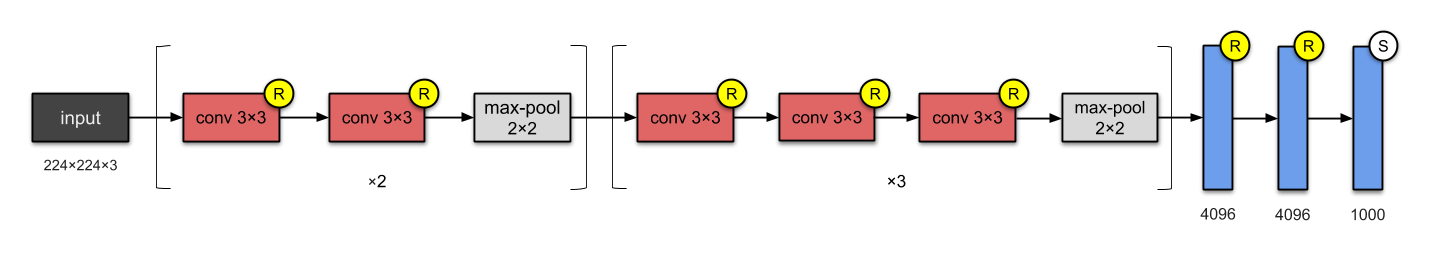

Check out the introduction to the architectures [here](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d) and the article explaining the number of filters [here](https://towardsdatascience.com/understanding-alexnet-a-detailed-walkthrough-20cd68a490aa).

In [1]:
# This is so that I can utilize the storage space in my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



As we have previously resized the images to a shape of (224, 224, 3), we are going to use them directly from the directory *'/Image Datasets/cats_and_dogs_alexnet/'*

In [2]:
# Ensuring we are using the right dataset from the right directory
import os

base_dir = '/content/drive/My Drive/Image Datasets/cats_and_dogs_alexnet/'

alexnet_cats_train_dir = os.path.join(base_dir, 'train/cats')
alexnet_cats_val_dir = os.path.join(base_dir, 'validation/cats')
alexnet_cats_test_dir = os.path.join(base_dir, 'test/cats')

alexnet_dogs_train_dir = os.path.join(base_dir, 'train/dogs')
alexnet_dogs_val_dir = os.path.join(base_dir, 'validation/dogs')
alexnet_dogs_test_dir = os.path.join(base_dir, 'test/dogs')

In [3]:
print('Total training cat images: ', len(os.listdir(alexnet_cats_train_dir)))
print('Total validation cat images: ', len(os.listdir(alexnet_cats_val_dir)))
print('Total test cat images: ', len(os.listdir(alexnet_cats_test_dir)))

print('Total training dog images: ', len(os.listdir(alexnet_dogs_train_dir)))
print('Total validation dog images: ', len(os.listdir(alexnet_dogs_val_dir)))
print('Total test dog images: ', len(os.listdir(alexnet_dogs_test_dir)))

Total training cat images:  1000
Total validation cat images:  500
Total test cat images:  500
Total training dog images:  1000
Total validation dog images:  500
Total test dog images:  500


# Building the ConvNet

As mentioned, the architecture that we are going to use here is the VGG16 architecture. Like the last one, we will build two models, with the first one taking in default images while the second one taking in images that are augmented. Then, the accuracy and loss of each model are compared.

In the last layer, we are using the sigmoid activation as we are doing a binary classification. Take note that when tackling a multi-classification problem, softmax activation function usually yields a better result.
While the probabilities sum for softmax activation function will yield 1, that for sigmoid activation function will not.

Formula to calculate output shape after each convolution layer:

[(W−K+2P)/S]+1

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

# Data Preprocessing

1. Read the image files
2. Decode the JPEG content to RGB grids of pixels
3. Convert them to floating point tensors
4. Rescale the pixel values (0-255) to (0, 1)


By using the ImageDataGenerator module, we can customize our own preprocessing pipeline before we fit the model to the images. Here, we will do a quick rescale before fitting the model.






The ImageDataGenerator can take in much more arguments like shear_range, zoom_range, horizontal_flip or vertical_flip to help generate more images of such properties. You can check out [this page](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to make more tweaks before training.





Then, we generate batches of augmented images from our directory using flow_from_directory() which also takes in a few parameters like class_mode and batch_size. The class_mode parameter determines how we transform our label arrays. For example, a 'categorical' would do a one-hot encoding to the arrays of labels, while 'binary' here will return a 1D binary labels.

In [6]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# class_mode: binary because we need binary labels (from using binary_crossentropy)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# Output of the generators to show the shape of the images
for data, label in train_generator:
  print("Data batch shape: ", data.shape)
  print("Label batch shape: ", label.shape)
  break

Data batch shape:  (20, 224, 224, 3)
Label batch shape:  (20,)


# Fit the model

Remember: the steps_per_epoch multiplied with epochs should return you the number of data in your training set, here 2000(1000 cat images and 1000 dog images).

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 590s 6s/step - loss: 0.6938 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 41s 409ms/step - loss: 0.6941 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 40s 398ms/step - loss: 0.6934 - accuracy: 0.4755 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
100/100 [==============================] - 40s 404ms/step - loss: 0.6939 - accuracy: 0.4985 - val_loss: 0.6925 - val_accuracy: 0.5530
Epoch 5/20
100/100 [==============================] - 40s 402ms/step - loss: 0.6958 - accuracy: 0.5365 - val_loss: 0.6836 - val_accuracy: 0.5930
Epoch 6/20
100/100 [==============================] - 40s 403ms/step - loss: 0.7034 - accuracy: 0.5625 - val_loss: 0.6745 - val_accuracy: 0.5960
Epoch 7/20
100/100 [==============================] - 40

Using fit_generator, it expects as its first argument a Python generator that yield batches of inputs and targets indefinitely, we need to tell the Keras model how many samples to draw before declaring an epoch is over
- steps_per_epoch

In [10]:
print("Training accuracy: ", history.history['accuracy'][-1])
print("Validation accuracy: ", history.history['val_accuracy'][-1])

print("Training loss: ", history.history['loss'][-1])
print("Validation loss: ", history.history['val_loss'][-1])

Training accuracy:  0.9004999995231628
Validation accuracy:  0.7129999995231628
Training loss:  0.2375950813293457
Validation loss:  0.9395265579223633


As we have stored our model in the *history* variable, we have access to insights that describe our model here, namely: accuracy, loss, validation accuracy and validation loss.

Taking number of epochs as X, and the variable to see as Y, we plot a graph to see how the accuracy and validation accuracy changed during training, as well as the loss and validation loss.

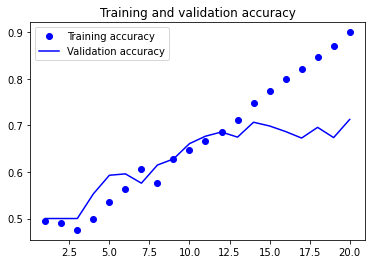

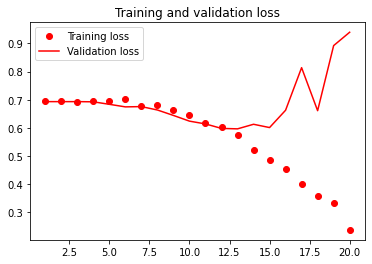

In [11]:
# Plot the loss and accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Next, we will try and augment the data and train the model again.

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=20, class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 43s 426ms/step - loss: 0.6132 - accuracy: 0.6860 - val_loss: 0.7841 - val_accuracy: 0.5980
Epoch 2/20
100/100 [==============================] - 42s 419ms/step - loss: 0.5934 - accuracy: 0.6980 - val_loss: 0.5395 - val_accuracy: 0.7390
Epoch 3/20
100/100 [==============================] - 42s 419ms/step - loss: 0.5928 - accuracy: 0.7010 - val_loss: 0.5929 - val_accuracy: 0.7030
Epoch 4/20
100/100 [==============================] - 42s 415ms/step - loss: 0.6156 - accuracy: 0.7020 - val_loss: 0.5591 - val_accuracy: 0.7280
Epoch 5/20
100/100 [==============================] - 42s 417ms/step - loss: 0.5696 - accuracy: 0.7150 - val_loss: 0.5493 - val_accuracy: 0.7240
Epoch 6/20
100/100 [==============================] - 42s 415ms/step - loss: 0.5669 - accuracy: 0.7215 - val_loss: 0.5819 - val_accuracy: 0.6820
Epoch 7/20
100/100 [==============================] - 42s 417ms/step - loss: 0.5636 - accuracy: 0.7180 - val_loss: 0.5272 - val_ac

In [24]:
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print("Training accuracy: ", acc)
print("Training loss: ", loss)

print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

Training accuracy:  0.7854999899864197
Training loss:  0.47830432653427124
Validation accuracy:  0.7940000295639038
Validation loss:  0.42858418822288513


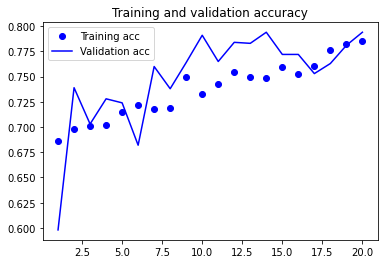

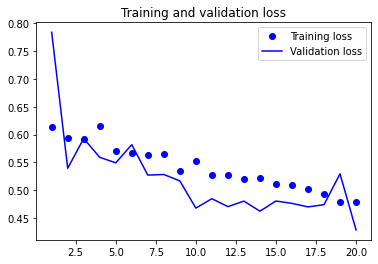

In [25]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
# Save the model
model.save("vgg_16.h5")

Image predicted is a cat image


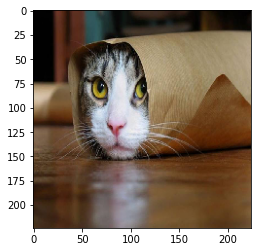

In [28]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

label_indices = train_generator.class_indices

sample_cat_img_path = "/content/drive/My Drive/Image Datasets/random_pictures/sample_cat.jpeg"
img = image.load_img(sample_cat_img_path, target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model

saved_model = load_model("vgg_16.h5")
output = saved_model.predict(img)

if output[0][0] == label_indices['cats']:
  print("Image predicted is a cat image")
else:
  print("Image predicted is a dog image")

As you can see, after data augmentation, the validation accuracy achieved a slight increase and the training accuracy dropped a little, which suggests that our model is not overfitting. Although this is not the original VGG16 architecture but a modified one, it is still able to produce a significantly good result.

In the next notebook, we will try to use transfer learning based on VGG16 network and see how it can perform better on the same task, since transfer learning usually yields better performance.